In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [5]:
x = np.random.randn(100, 2)
y = x[:, 0] * 2 + x[:, 1] * 3 + np.random.randn(100) * 0.1

**Momentum: Adds velocity to gradient descent**

In [2]:
def momentum_gd(x, y, learning_rate=0.01, momentum=0.9, epochs=100):
    weights = np.random.randn(x.shape[1])
    velocity = np.zeros_like(weights)
    losses = []
    
    for epoch in range(epochs):
        predictions = x @ weights
        error = predictions - y
        loss = np.mean(error ** 2)
        losses.append(loss)
        
        gradient = x.T @ error / len(x)
        velocity = momentum * velocity + learning_rate * gradient
        weights -= velocity
    
    return weights, losses

**RMSprop: Adaptive learning rate**

In [3]:
def rmsprop_gd(x, y, learning_rate=0.01, decay=0.9, epochs=100):
    weights = np.random.randn(x.shape[1])
    cache = np.zeros_like(weights)
    losses = []
    epsilon = 1e-8
    
    for epoch in range(epochs):
        predictions = x @ weights
        error = predictions - y
        loss = np.mean(error ** 2)
        losses.append(loss)
        
        gradient = x.T @ error / len(x)
        cache = decay * cache + (1 - decay) * gradient ** 2
        weights -= learning_rate * gradient / (np.sqrt(cache) + epsilon) 
    
    return weights, losses

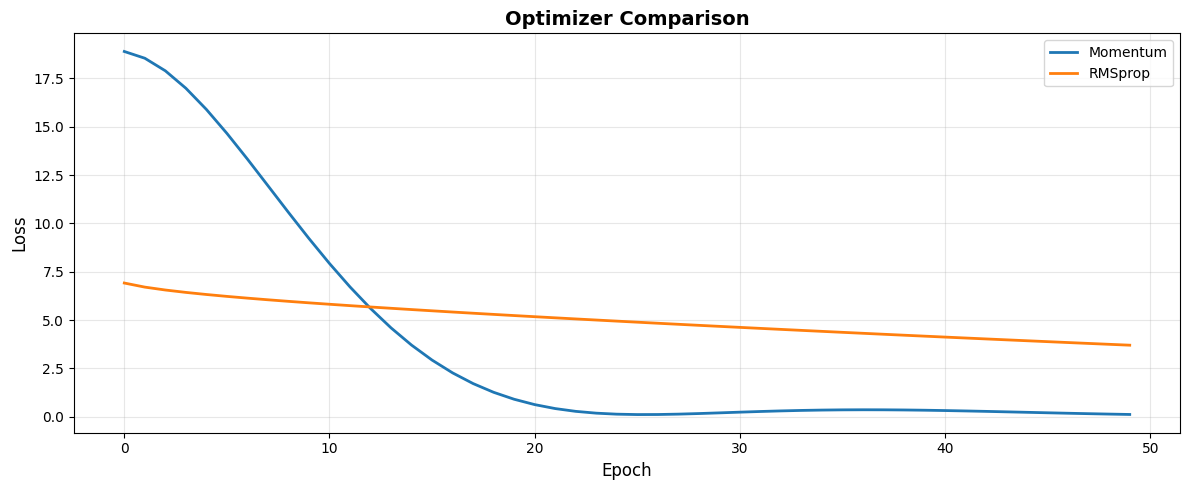

In [6]:
weights_momentum, losses_momentum = momentum_gd(x, y, epochs=50)
weights_rmsprop, losses_rmsprop = rmsprop_gd(x, y, epochs=50)

plt.figure(figsize=(12, 5))
plt.plot(losses_momentum, label='Momentum', linewidth=2)
plt.plot(losses_rmsprop, label='RMSprop', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Optimizer Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()